<a href="https://colab.research.google.com/github/dg154/Demand_Forecast/blob/main/Demand_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/train_0irEZ2H.csv')

In [3]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [4]:
df[['day','month','year']]=df['week'].str.split('/',expand=True)

In [5]:
df.drop('week', axis=1,inplace=True)

In [6]:
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [7]:
df.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [8]:
df.shape

(150150, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   store_id         150150 non-null  int64  
 2   sku_id           150150 non-null  int64  
 3   total_price      150149 non-null  float64
 4   base_price       150150 non-null  float64
 5   is_featured_sku  150150 non-null  int64  
 6   is_display_sku   150150 non-null  int64  
 7   units_sold       150150 non-null  int64  
 8   day              150150 non-null  object 
 9   month            150150 non-null  object 
 10  year             150150 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 12.6+ MB


In [10]:
df.isnull().sum()

,0
record_ID,0
store_id,0
sku_id,0
total_price,1
base_price,0
is_featured_sku,0
is_display_sku,0
units_sold,0
day,0
month,0


In [11]:
df = df.dropna(subset=['total_price'])

In [12]:
df.isnull().sum()

,0
record_ID,0
store_id,0
sku_id,0
total_price,0
base_price,0
is_featured_sku,0
is_display_sku,0
units_sold,0
day,0
month,0


In [13]:
df.shape

(150149, 11)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x, y = df.drop('units_sold', axis=1), df['units_sold']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [15]:
model=RandomForestRegressor(n_jobs=-1)
model.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [16]:
model.score(x_test,y_test)

0.7712756198834348

In [17]:
from sklearn.metrics import root_mean_squared_error
y_pred=model.predict(x_test)
rmse=root_mean_squared_error(y_test,y_pred)
rmse

27.358529044008954

In [18]:
df.units_sold.describe()

,units_sold
count,150149.000000
mean,51.674543
std,60.207962
min,1.000000
25%,20.000000
50%,35.000000
75%,62.000000
max,2876.000000


<Axes: >

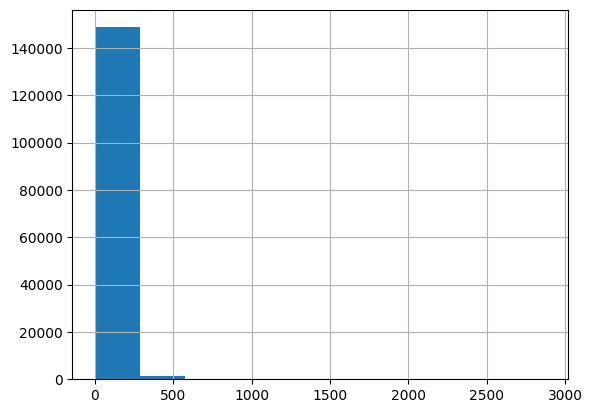

In [19]:
df.units_sold.hist()

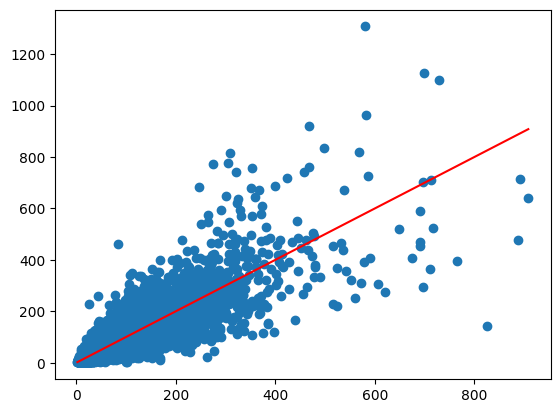

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_pred,y_test)
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_pred.min(),y_pred.max()),color='red')

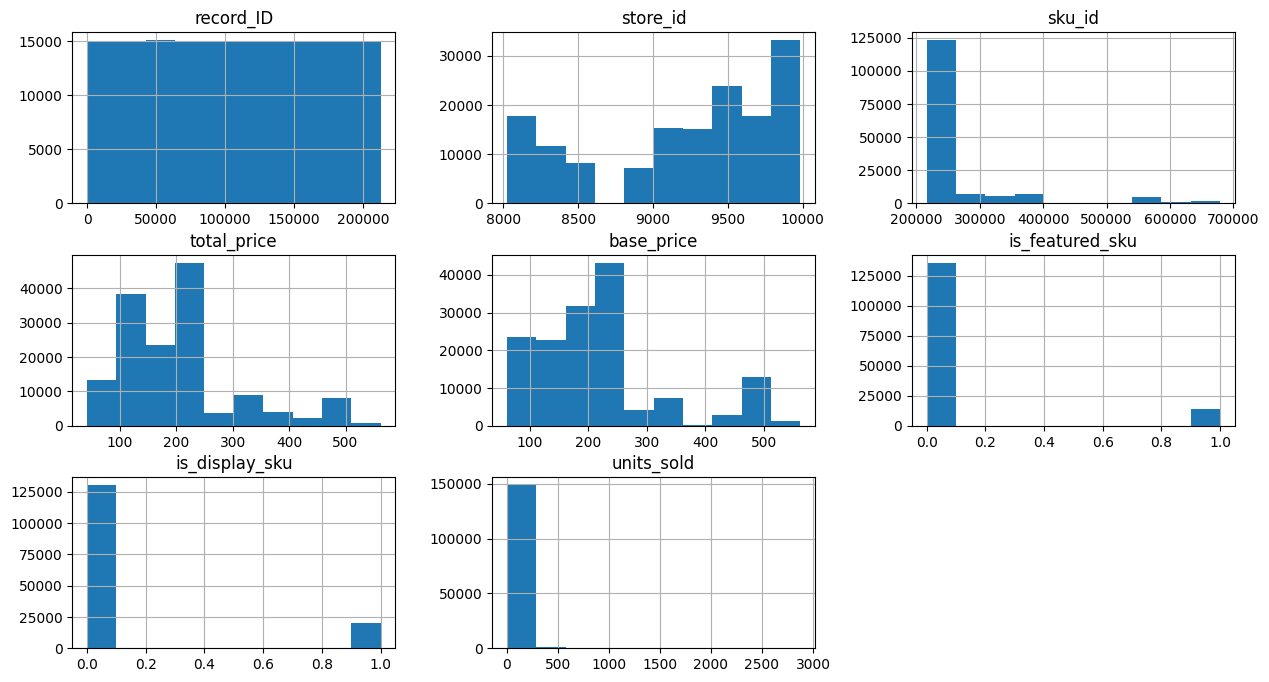

In [21]:
df.hist(figsize=(15,8))
plt.show()

In [22]:
df=df.drop('record_ID', axis=1)

In [23]:
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [24]:
len(df.store_id.unique())

76

In [25]:
len(df.sku_id.unique())

28

In [26]:
df=df[df.units_sold<df.units_sold.quantile(0.99)]

In [27]:
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


<Axes: >

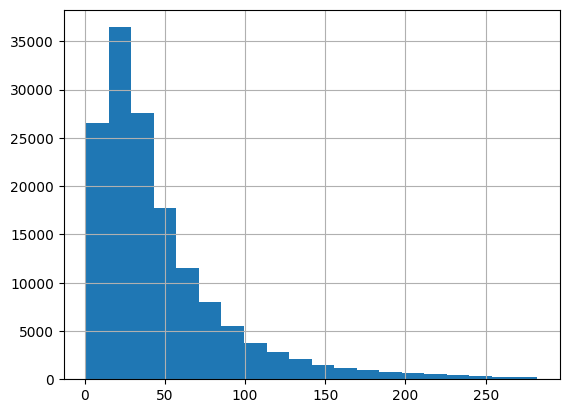

In [28]:
df.units_sold.hist(bins=20)

In [29]:
df=df.join(pd.get_dummies(df.store_id,prefix='store')).drop('store_id',axis=1)
df=df.join(pd.get_dummies(df.sku_id,prefix='item')).drop('sku_id',axis=1)

In [30]:
model=RandomForestRegressor(n_jobs=-1)
x, y = df.drop('units_sold', axis=1), df['units_sold']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [31]:
model.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [32]:
model.score(x_test,y_test)

0.827271308209298

In [33]:
y_pred=model.predict(x_test)
rmse=root_mean_squared_error(y_test,y_pred)
rmse

17.76671537693713

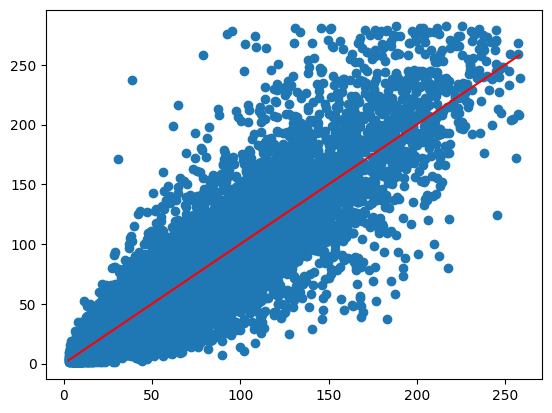

In [34]:
plt.scatter(y_pred,y_test)
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_pred.min(),y_pred.max()),color='red')

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [150,200],
    'min_samples_split': [3, 5, 10, 20, 50]
}
model=RandomForestRegressor(n_jobs=-1)
grid_search=GridSearchCV(model,param_grid, verbose=2,cv=5)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..............min_samples_split=3, n_estimators=150; total time= 3.8min
[CV] END ..............min_samples_split=3, n_estimators=150; total time= 3.7min
[CV] END ..............min_samples_split=3, n_estimators=150; total time= 3.7min
[CV] END ..............min_samples_split=3, n_estimators=150; total time= 3.7min
[CV] END ..............min_samples_split=3, n_estimators=150; total time= 3.6min
[CV] END ..............min_samples_split=3, n_estimators=200; total time= 4.9min
[CV] END ..............min_samples_split=3, n_estimators=200; total time= 4.9min
[CV] END ..............min_samples_split=3, n_estimators=200; total time= 4.8min


In [ ]:
best_model=grid_search.best_estimator_

In [ ]:
grid_search.best_params_

In [ ]:
best_model.score(x_test,y_test)

In [ ]:
def predict_demand_rf_with_date():
    print("\nEnter details for prediction:")
    date = int(input("Enter day of the month (1-31): "))
    month = int(input("Enter month (1-12): "))
    year = int(input("Enter year (e.g., 2023): "))
    total_price = float(input("Enter total price: "))
    base_price = float(input("Enter base price: "))
    is_featured_sku = int(input("Is the SKU featured? (1 for Yes, 0 for No): "))
    is_display_sku = int(input("Is the SKU displayed? (1 for Yes, 0 for No): "))
    store_id = int(input("Enter store ID: "))
    sku_id = int(input("Enter SKU ID: "))

    # Create a DataFrame for the user input
    user_features = pd.DataFrame([{
        'store_id': store_id,
        'sku_id': sku_id,
        'total_price': total_price,
        'base_price': base_price,
        'is_featured_sku': is_featured_sku,
        'is_display_sku': is_display_sku,
        'date': date,
        'month': month,
        'year': year
    }])

    # Predict demand using the Random Forest model
    prediction =  model.predict(user_features)[0]
    print(f"\nPredicted demand for the given input: {prediction:.2f}")

# Call the function to allow user input
predict_demand_rf_with_date()